In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [8]:
filepath = 'C:/Users/User/Downloads/rus_jokes/russian_jokes.csv'
data = pd.read_csv(filepath)
df = data.copy()
df

,text,comments_count,likes_count,reposts_count,views_count,date,unique_key,group_source
0,Директор отчитывает главбуха-еврея: \n- Яков С...,0,72,23,2252,2024-01-12 17:22:00,m3Cvn1OcrSBlJ_gABgIoRQBcyH0V,https://vk.com/jewishpugs
1,"— Изя, как вы думаете, объявления в газетах да...",0,118,43,5309,2024-01-12 13:21:00,GPIii1u2kEabZEbnHqLTAyZA37ES,https://vk.com/jewishpugs
2,Метро. На единственное свободное место садится...,2,143,38,4747,2024-01-12 09:20:00,GJLahnmtLvVcc8x41sdV-lACQNPy,https://vk.com/jewishpugs
3,Тюлька и килька вышли замуж за евреев. Теперь ...,2,287,116,12010,2024-01-12 05:20:15,lBev3CChZteVPLaD1GHpYawoK5a4,https://vk.com/jewishpugs
4,Судился еврей с армянином. В итоге судье дали ...,2,632,267,19641,2024-01-11 21:14:00,I0rV0HbWhAkGHsnPNnBaONSUkKeX,https://vk.com/jewishpugs
...,...,...,...,...,...,...,...,...
63922,"Просыпается мужик с дичайшего бодуна. Лежал, л...",28,405,4,14757,2017-01-01 13:01:55,vDjdEcFiG8YrKcjeXaSvjUijhwMb,https://vk.com/baneks
63923,-Вы кто по гороскопу?\n-Я рыба!\n-А я пиво!,28,460,2,16429,2017-01-01 06:57:26,ehQYA9rZywBq_iLUFL0q7Ko4lv3c,https://vk.com/baneks
63924,— Как узнать снеговик женщина или мужчина? \n—...,23,203,0,14929,2017-01-01 06:55:52,8fwnP1V5aLBdRMjPFe59pH7EfdWc,https://vk.com/baneks
63925,"— А у вас хлеб свежий?\n— Нет, прошлогодний!",48,756,24,23646,2016-12-31 23:00:25,cr-Y3pWxUJfKP4KnQ7Jl823354aC,https://vk.com/baneks


In [5]:
df['group_source'].unique()

array(['https://vk.com/jewishpugs', 'https://vk.com/anekdotikategoriib',
       'https://vk.com/jumoreski', 'https://vk.com/baneks'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63927 entries, 0 to 63926
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            61685 non-null  object
 1   comments_count  63927 non-null  int64 
 2   likes_count     63927 non-null  int64 
 3   reposts_count   63927 non-null  int64 
 4   views_count     63927 non-null  int64 
 5   date            63927 non-null  object
 6   unique_key      63927 non-null  object
 7   group_source    63927 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [14]:
df['views_count'] = pd.to_numeric(df['views_count'], errors='coerce')

sorted_df = df.sort_values(by='views_count', ascending=False)
sorted_df

,text,comments_count,likes_count,reposts_count,views_count,date,unique_key,group_source
44700,"Я, конечно, может быть и надоел вам рекламой м...",1,5323,37,5017142,2018-10-02 11:12:37,h4C_B_hhooXWhNGRr7jchNlMTE7A,https://vk.com/jumoreski
4606,"К сожалению, многие анекдоты не попадают в паб...",54,232,103,1309091,2022-06-29 01:38:00,86FOV90tt6mIYNACsre8JFzK8iz_,https://vk.com/anekdotikategoriib
7694,"Маленький мальчик заглянул в комнату, где мать...",94,9615,7872,1017124,2023-04-13 00:38:00,IE3-iJrchP3e1aYJEQm8kzd2x9aR,https://vk.com/anekdotikategoriib
7365,"Папа с сыном пошли однажды в горы и сын, удари...",89,8579,8728,854737,2023-05-10 06:38:00,lgusrwgzuEYJQhwkcoGoXfD46Tqz,https://vk.com/anekdotikategoriib
27192,Курить люблю - пиздец,0,20196,8809,718833,2022-06-19 16:25:00,heIllFQ8Lh3vXrV5UbaXvi8g7q4p,https://vk.com/jumoreski
...,...,...,...,...,...,...,...,...
4602,"Было видно, что резюме Яше помогала писать баб...",0,66,18,1051,2021-01-08 03:00:04,9BzZNAarET0DaAoyGD3GqTicuz9x,https://vk.com/jewishpugs
4601,"— Роза Моисеевна, сколько вам лет? \n— Да кажд...",0,69,15,1048,2021-01-08 04:00:05,MeDbnKys29VW-Mpewp6yydaw-Jkl,https://vk.com/jewishpugs
4604,Если вам от меня ничего не нужно — мне для вас...,0,78,22,1046,2021-01-08 02:11:11,OMxdEFxEVKRmn34dXGyYnlQn83iL,https://vk.com/jewishpugs
4603,"— Сарочка, вот я смотрю на тебя и не могу поня...",0,68,27,1026,2021-01-08 02:34:14,UzrtpjYohZ9OCar_MeyIYDfO0YYm,https://vk.com/jewishpugs


In [16]:
df_new = df.drop(['unique_key'], axis=1)

In [17]:
df_new

,text,comments_count,likes_count,reposts_count,views_count,date,group_source
0,Директор отчитывает главбуха-еврея: \n- Яков С...,0,72,23,2252,2024-01-12 17:22:00,https://vk.com/jewishpugs
1,"— Изя, как вы думаете, объявления в газетах да...",0,118,43,5309,2024-01-12 13:21:00,https://vk.com/jewishpugs
2,Метро. На единственное свободное место садится...,2,143,38,4747,2024-01-12 09:20:00,https://vk.com/jewishpugs
3,Тюлька и килька вышли замуж за евреев. Теперь ...,2,287,116,12010,2024-01-12 05:20:15,https://vk.com/jewishpugs
4,Судился еврей с армянином. В итоге судье дали ...,2,632,267,19641,2024-01-11 21:14:00,https://vk.com/jewishpugs
...,...,...,...,...,...,...,...
63922,"Просыпается мужик с дичайшего бодуна. Лежал, л...",28,405,4,14757,2017-01-01 13:01:55,https://vk.com/baneks
63923,-Вы кто по гороскопу?\n-Я рыба!\n-А я пиво!,28,460,2,16429,2017-01-01 06:57:26,https://vk.com/baneks
63924,— Как узнать снеговик женщина или мужчина? \n—...,23,203,0,14929,2017-01-01 06:55:52,https://vk.com/baneks
63925,"— А у вас хлеб свежий?\n— Нет, прошлогодний!",48,756,24,23646,2016-12-31 23:00:25,https://vk.com/baneks


In [20]:
df_new['text'] = df_new['text'].str.lower()

In [21]:
df_new['text']

0        директор отчитывает главбуха-еврея: \n- яков с...
1        — изя, как вы думаете, объявления в газетах да...
2        метро. на единственное свободное место садится...
3        тюлька и килька вышли замуж за евреев. теперь ...
4        судился еврей с армянином. в итоге судье дали ...
                               ...                        
63922    просыпается мужик с дичайшего бодуна. лежал, л...
63923          -вы кто по гороскопу?\n-я рыба!\n-а я пиво!
63924    — как узнать снеговик женщина или мужчина? \n—...
63925         — а у вас хлеб свежий?\n— нет, прошлогодний!
63926           — у вас анекдоты свежие? \n— прошлогодние!
Name: text, Length: 63927, dtype: object

In [22]:
!pip install pymorphy2


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import string

def remove_punct(text):
    if isinstance(text, str): 
        new_text = ''.join([char for char in text if char not in string.punctuation])
        return new_text
    else:
        return str(text)  

df_new['text'] = df_new['text'].apply(remove_punct)
df_new['text']

0        директор отчитывает главбухаеврея \n яков саму...
1        — изя как вы думаете объявления в газетах дают...
2        метро на единственное свободное место садится ...
3        тюлька и килька вышли замуж за евреев теперь о...
4        судился еврей с армянином в итоге судье дали п...
                               ...                        
63922    просыпается мужик с дичайшего бодуна лежал леж...
63923                вы кто по гороскопу\nя рыба\nа я пиво
63924    — как узнать снеговик женщина или мужчина \n— ...
63925            — а у вас хлеб свежий\n— нет прошлогодний
63926             — у вас анекдоты свежие \n— прошлогодние
Name: text, Length: 63927, dtype: object

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text, language='russian')
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return str(text) 

df_new['text'] = df_new['text'].apply(remove_stopwords)
df_new['text']

0        директор отчитывает главбухаеврея яков самуило...
1        — изя думаете объявления газетах дают результа...
2        метро единственное свободное место садится кла...
3             тюлька килька вышли замуж евреев мойва сайра
4        судился еврей армянином итоге судье дали пятна...
                               ...                        
63922    просыпается мужик дичайшего бодуна лежал лежал...
63923                                  гороскопу рыба пиво
63924    — узнать снеговик женщина мужчина — посмотрите...
63925                         — хлеб свежий — прошлогодний
63926                     — анекдоты свежие — прошлогодние
Name: text, Length: 63927, dtype: object

In [35]:
morph = pymorphy2.MorphAnalyzer()

def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text, language='russian')
        lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
        return ' '.join(lemmatized_words)
    else:
        return str(text)

df_new['text'] = df_new['text'].apply(lemmatize_text)
df_new['text']

0        директор отчитывать главбухаеврей яков самуило...
1        — изя думать объявление газета давать результа...
2        метро единственный свободный место садиться кл...
3              тюлька килька выйти замуж еврей мойва сайра
4        судиться еврей армянин итог судья дать пятнадц...
                               ...                        
63922    просыпаться мужик дикий бодун лежать лежать за...
63923                                   гороскоп рыба пиво
63924    — узнать снеговик женщина мужчина — посмотреть...
63925                         — хлеб свежий — прошлогодний
63926                      — анекдот свежий — прошлогодний
Name: text, Length: 63927, dtype: object

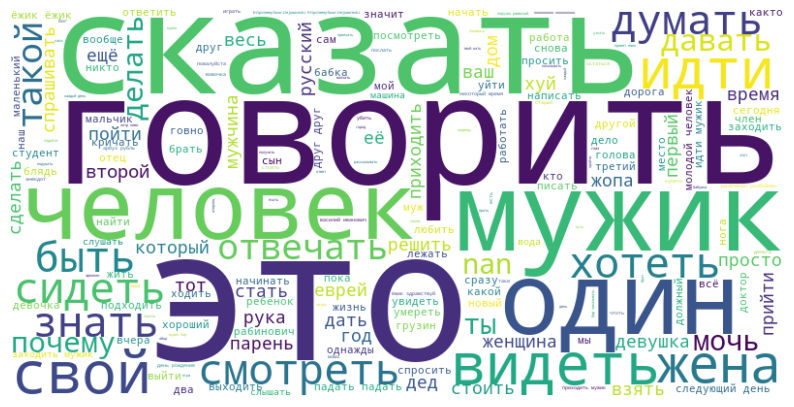

In [36]:
from wordcloud import WordCloud

df_new['text'] = df_new['text'].astype(str)

tokenized_text = [word for sentence in df_new['text'] for word in word_tokenize(sentence)]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokenized_text))

# Визуализация облака слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
df_new

,text,comments_count,likes_count,reposts_count,views_count,date,group_source
0,директор отчитывать главбухаеврей яков самуило...,0,72,23,2252,2024-01-12 17:22:00,https://vk.com/jewishpugs
1,— изя думать объявление газета давать результа...,0,118,43,5309,2024-01-12 13:21:00,https://vk.com/jewishpugs
2,метро единственный свободный место садиться кл...,2,143,38,4747,2024-01-12 09:20:00,https://vk.com/jewishpugs
3,тюлька килька выйти замуж еврей мойва сайра,2,287,116,12010,2024-01-12 05:20:15,https://vk.com/jewishpugs
4,судиться еврей армянин итог судья дать пятнадц...,2,632,267,19641,2024-01-11 21:14:00,https://vk.com/jewishpugs
...,...,...,...,...,...,...,...
63922,просыпаться мужик дикий бодун лежать лежать за...,28,405,4,14757,2017-01-01 13:01:55,https://vk.com/baneks
63923,гороскоп рыба пиво,28,460,2,16429,2017-01-01 06:57:26,https://vk.com/baneks
63924,— узнать снеговик женщина мужчина — посмотреть...,23,203,0,14929,2017-01-01 06:55:52,https://vk.com/baneks
63925,— хлеб свежий — прошлогодний,48,756,24,23646,2016-12-31 23:00:25,https://vk.com/baneks


In [40]:
!pip install gensim


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 1.4 MB/s eta 0:00:18
   ---------------------------------------- 0.0/24.0 MB 393.8 kB/s eta 0:01:01
   ---------------------------------------- 0.1/24.0 MB 819.2 kB/s eta 0:00:30
   ---------------------------------------- 0.2/24.0 MB 833.5 kB/s eta 0:00:29
   ---------------------------------------- 0.2/24.0 MB 1.2 MB/s eta 0:00:21
   ---------------------------------------- 0.2/24.0 MB 1.2 MB/s eta 0:00:21
   ---------------------------------------- 0.2/24.0 MB 1.2 MB/s eta 0:00:21
    --------------------------------------- 0.4/24.0 MB 1.1 MB/s eta 0:00:23
    --------------------------------------- 0.4/24.0 MB 1.1 MB/s eta 0:00:23
    --------------------------------------- 0.4/24.0 MB 1.1 MB/s eta 0:00:23
    --------------------------------------- 0.4/24.0 MB 1.1 MB/s eta 0:00:23
   - -------------------------------------- 0.6/24.0 MB 1.2 MB/s eta 0:00:20



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
df_new

,text,comments_count,likes_count,reposts_count,views_count,date,group_source
0,директор отчитывать главбухаеврей яков самуило...,0,72,23,2252,2024-01-12 17:22:00,https://vk.com/jewishpugs
1,— изя думать объявление газета давать результа...,0,118,43,5309,2024-01-12 13:21:00,https://vk.com/jewishpugs
2,метро единственный свободный место садиться кл...,2,143,38,4747,2024-01-12 09:20:00,https://vk.com/jewishpugs
3,тюлька килька выйти замуж еврей мойва сайра,2,287,116,12010,2024-01-12 05:20:15,https://vk.com/jewishpugs
4,судиться еврей армянин итог судья дать пятнадц...,2,632,267,19641,2024-01-11 21:14:00,https://vk.com/jewishpugs
...,...,...,...,...,...,...,...
63922,просыпаться мужик дикий бодун лежать лежать за...,28,405,4,14757,2017-01-01 13:01:55,https://vk.com/baneks
63923,гороскоп рыба пиво,28,460,2,16429,2017-01-01 06:57:26,https://vk.com/baneks
63924,— узнать снеговик женщина мужчина — посмотреть...,23,203,0,14929,2017-01-01 06:55:52,https://vk.com/baneks
63925,— хлеб свежий — прошлогодний,48,756,24,23646,2016-12-31 23:00:25,https://vk.com/baneks


In [46]:
!pip install gensim



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from gensim.models import KeyedVectors

model_path = 'C:/Users/User/Downloads/cc.ru.300.vec.gz' 
fasttext_model = KeyedVectors.load_word2vec_format(model_path, binary=False, encoding='utf-8', unicode_errors='ignore')

df_for_token = df_new.copy()
df_for_token['tokenized_texts'] = df_new['text'].apply(lambda x: word_tokenize(x, language='russian'))

def vectorize_text(tokens):
    vectors = [fasttext_model[word] for word in tokens if word in fasttext_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(fasttext_model.vector_size)

df_for_token['text_embeddings'] = df_for_token['tokenized_texts'].apply(vectorize_text)

# Создание столбцов с отдельными значениями для каждой размерности вектора
df_embeddings = pd.DataFrame(df_for_token['text_embeddings'].to_list(), columns=[f'embedding_{i}' for i in range(fasttext_model.vector_size)])

# Объединение DataFrame с исходными данными и векторами
df_with_embeddings = pd.concat([df, df_embeddings], axis=1)
df_with_embeddings

,text,comments_count,likes_count,reposts_count,views_count,date,unique_key,group_source,embedding_0,embedding_1,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,Директор отчитывает главбуха-еврея: \n- Яков С...,0,72,23,2252,2024-01-12 17:22:00,m3Cvn1OcrSBlJ_gABgIoRQBcyH0V,https://vk.com/jewishpugs,0.026231,-0.030208,...,-0.019200,-0.011640,0.010785,-0.018610,-0.029773,0.002687,0.008306,0.007435,-0.009533,-0.020367
1,"— Изя, как вы думаете, объявления в газетах да...",0,118,43,5309,2024-01-12 13:21:00,GPIii1u2kEabZEbnHqLTAyZA37ES,https://vk.com/jewishpugs,0.015993,-0.032593,...,-0.005900,0.006853,-0.023873,-0.035400,-0.061180,-0.009280,-0.015807,0.013287,0.019473,-0.010713
2,Метро. На единственное свободное место садится...,2,143,38,4747,2024-01-12 09:20:00,GJLahnmtLvVcc8x41sdV-lACQNPy,https://vk.com/jewishpugs,0.053792,-0.026156,...,0.003724,0.013684,-0.002020,-0.018900,-0.074424,-0.011276,-0.027164,0.021792,0.010180,-0.020636
3,Тюлька и килька вышли замуж за евреев. Теперь ...,2,287,116,12010,2024-01-12 05:20:15,lBev3CChZteVPLaD1GHpYawoK5a4,https://vk.com/jewishpugs,0.049871,-0.053714,...,0.000643,0.080771,-0.036357,-0.019814,0.008329,0.024557,0.053671,0.051000,-0.034629,-0.057814
4,Судился еврей с армянином. В итоге судье дали ...,2,632,267,19641,2024-01-11 21:14:00,I0rV0HbWhAkGHsnPNnBaONSUkKeX,https://vk.com/jewishpugs,0.047550,-0.042288,...,-0.040462,-0.014887,-0.011287,-0.003762,-0.021350,-0.025275,0.015300,0.039575,0.045713,0.019275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,"Просыпается мужик с дичайшего бодуна. Лежал, л...",28,405,4,14757,2017-01-01 13:01:55,vDjdEcFiG8YrKcjeXaSvjUijhwMb,https://vk.com/baneks,0.063081,-0.043443,...,-0.010314,0.005533,-0.008300,-0.032948,-0.057800,-0.010652,-0.011048,0.038624,-0.012938,-0.027000
63923,-Вы кто по гороскопу?\n-Я рыба!\n-А я пиво!,28,460,2,16429,2017-01-01 06:57:26,ehQYA9rZywBq_iLUFL0q7Ko4lv3c,https://vk.com/baneks,0.074933,-0.073600,...,-0.002067,0.040267,-0.044233,-0.043400,-0.003800,-0.087467,0.007167,-0.052833,-0.006767,-0.046600
63924,— Как узнать снеговик женщина или мужчина? \n—...,23,203,0,14929,2017-01-01 06:55:52,8fwnP1V5aLBdRMjPFe59pH7EfdWc,https://vk.com/baneks,0.003825,-0.013550,...,0.028900,0.039237,-0.033712,-0.034525,-0.119025,-0.017238,-0.024200,0.020900,0.014863,-0.033125
63925,"— А у вас хлеб свежий?\n— Нет, прошлогодний!",48,756,24,23646,2016-12-31 23:00:25,cr-Y3pWxUJfKP4KnQ7Jl823354aC,https://vk.com/baneks,0.012680,-0.018660,...,0.091360,0.086580,-0.042140,-0.054380,-0.190420,-0.052020,-0.084920,0.042160,-0.017520,-0.029960


In [49]:
df_train = df_with_embeddings.drop(['text', 'date', 'unique_key'], axis=1)

In [50]:
df_train

,comments_count,likes_count,reposts_count,views_count,group_source,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,0,72,23,2252,https://vk.com/jewishpugs,0.026231,-0.030208,0.007577,0.020512,0.014823,...,-0.019200,-0.011640,0.010785,-0.018610,-0.029773,0.002687,0.008306,0.007435,-0.009533,-0.020367
1,0,118,43,5309,https://vk.com/jewishpugs,0.015993,-0.032593,-0.012873,-0.004240,0.011507,...,-0.005900,0.006853,-0.023873,-0.035400,-0.061180,-0.009280,-0.015807,0.013287,0.019473,-0.010713
2,2,143,38,4747,https://vk.com/jewishpugs,0.053792,-0.026156,-0.005648,0.033712,0.025984,...,0.003724,0.013684,-0.002020,-0.018900,-0.074424,-0.011276,-0.027164,0.021792,0.010180,-0.020636
3,2,287,116,12010,https://vk.com/jewishpugs,0.049871,-0.053714,0.012271,-0.020300,0.010671,...,0.000643,0.080771,-0.036357,-0.019814,0.008329,0.024557,0.053671,0.051000,-0.034629,-0.057814
4,2,632,267,19641,https://vk.com/jewishpugs,0.047550,-0.042288,-0.015475,0.031500,0.035175,...,-0.040462,-0.014887,-0.011287,-0.003762,-0.021350,-0.025275,0.015300,0.039575,0.045713,0.019275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,28,405,4,14757,https://vk.com/baneks,0.063081,-0.043443,-0.021129,-0.020114,-0.006476,...,-0.010314,0.005533,-0.008300,-0.032948,-0.057800,-0.010652,-0.011048,0.038624,-0.012938,-0.027000
63923,28,460,2,16429,https://vk.com/baneks,0.074933,-0.073600,-0.020433,0.023000,-0.019900,...,-0.002067,0.040267,-0.044233,-0.043400,-0.003800,-0.087467,0.007167,-0.052833,-0.006767,-0.046600
63924,23,203,0,14929,https://vk.com/baneks,0.003825,-0.013550,-0.001112,-0.005975,0.047037,...,0.028900,0.039237,-0.033712,-0.034525,-0.119025,-0.017238,-0.024200,0.020900,0.014863,-0.033125
63925,48,756,24,23646,https://vk.com/baneks,0.012680,-0.018660,-0.027080,-0.036860,0.052720,...,0.091360,0.086580,-0.042140,-0.054380,-0.190420,-0.052020,-0.084920,0.042160,-0.017520,-0.029960


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63927 entries, 0 to 63926
Columns: 305 entries, comments_count to embedding_299
dtypes: float64(300), int64(4), object(1)
memory usage: 148.8+ MB


In [55]:
df_train

,comments_count,likes_count,reposts_count,views_count,group_source,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,0,72,23,2252,https://vk.com/jewishpugs,0.026231,-0.030208,0.007577,0.020512,0.014823,...,-0.019200,-0.011640,0.010785,-0.018610,-0.029773,0.002687,0.008306,0.007435,-0.009533,-0.020367
1,0,118,43,5309,https://vk.com/jewishpugs,0.015993,-0.032593,-0.012873,-0.004240,0.011507,...,-0.005900,0.006853,-0.023873,-0.035400,-0.061180,-0.009280,-0.015807,0.013287,0.019473,-0.010713
2,2,143,38,4747,https://vk.com/jewishpugs,0.053792,-0.026156,-0.005648,0.033712,0.025984,...,0.003724,0.013684,-0.002020,-0.018900,-0.074424,-0.011276,-0.027164,0.021792,0.010180,-0.020636
3,2,287,116,12010,https://vk.com/jewishpugs,0.049871,-0.053714,0.012271,-0.020300,0.010671,...,0.000643,0.080771,-0.036357,-0.019814,0.008329,0.024557,0.053671,0.051000,-0.034629,-0.057814
4,2,632,267,19641,https://vk.com/jewishpugs,0.047550,-0.042288,-0.015475,0.031500,0.035175,...,-0.040462,-0.014887,-0.011287,-0.003762,-0.021350,-0.025275,0.015300,0.039575,0.045713,0.019275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,28,405,4,14757,https://vk.com/baneks,0.063081,-0.043443,-0.021129,-0.020114,-0.006476,...,-0.010314,0.005533,-0.008300,-0.032948,-0.057800,-0.010652,-0.011048,0.038624,-0.012938,-0.027000
63923,28,460,2,16429,https://vk.com/baneks,0.074933,-0.073600,-0.020433,0.023000,-0.019900,...,-0.002067,0.040267,-0.044233,-0.043400,-0.003800,-0.087467,0.007167,-0.052833,-0.006767,-0.046600
63924,23,203,0,14929,https://vk.com/baneks,0.003825,-0.013550,-0.001112,-0.005975,0.047037,...,0.028900,0.039237,-0.033712,-0.034525,-0.119025,-0.017238,-0.024200,0.020900,0.014863,-0.033125
63925,48,756,24,23646,https://vk.com/baneks,0.012680,-0.018660,-0.027080,-0.036860,0.052720,...,0.091360,0.086580,-0.042140,-0.054380,-0.190420,-0.052020,-0.084920,0.042160,-0.017520,-0.029960


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['group_source'] = label_encoder.fit_transform(df_train['group_source'])
df_train

,comments_count,likes_count,reposts_count,views_count,group_source,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
0,0,72,23,2252,2,0.026231,-0.030208,0.007577,0.020512,0.014823,...,-0.019200,-0.011640,0.010785,-0.018610,-0.029773,0.002687,0.008306,0.007435,-0.009533,-0.020367
1,0,118,43,5309,2,0.015993,-0.032593,-0.012873,-0.004240,0.011507,...,-0.005900,0.006853,-0.023873,-0.035400,-0.061180,-0.009280,-0.015807,0.013287,0.019473,-0.010713
2,2,143,38,4747,2,0.053792,-0.026156,-0.005648,0.033712,0.025984,...,0.003724,0.013684,-0.002020,-0.018900,-0.074424,-0.011276,-0.027164,0.021792,0.010180,-0.020636
3,2,287,116,12010,2,0.049871,-0.053714,0.012271,-0.020300,0.010671,...,0.000643,0.080771,-0.036357,-0.019814,0.008329,0.024557,0.053671,0.051000,-0.034629,-0.057814
4,2,632,267,19641,2,0.047550,-0.042288,-0.015475,0.031500,0.035175,...,-0.040462,-0.014887,-0.011287,-0.003762,-0.021350,-0.025275,0.015300,0.039575,0.045713,0.019275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63922,28,405,4,14757,1,0.063081,-0.043443,-0.021129,-0.020114,-0.006476,...,-0.010314,0.005533,-0.008300,-0.032948,-0.057800,-0.010652,-0.011048,0.038624,-0.012938,-0.027000
63923,28,460,2,16429,1,0.074933,-0.073600,-0.020433,0.023000,-0.019900,...,-0.002067,0.040267,-0.044233,-0.043400,-0.003800,-0.087467,0.007167,-0.052833,-0.006767,-0.046600
63924,23,203,0,14929,1,0.003825,-0.013550,-0.001112,-0.005975,0.047037,...,0.028900,0.039237,-0.033712,-0.034525,-0.119025,-0.017238,-0.024200,0.020900,0.014863,-0.033125
63925,48,756,24,23646,1,0.012680,-0.018660,-0.027080,-0.036860,0.052720,...,0.091360,0.086580,-0.042140,-0.054380,-0.190420,-0.052020,-0.084920,0.042160,-0.017520,-0.029960


In [67]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import History
from tensorflow.keras.callbacks import TensorBoard

# Отделяем признаки (X) от целевой переменной (y)
X = df_train.drop('group_source', axis=1)
y = df_train['group_source']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=len(X.columns)))
model.add(Dense(len(df_train['group_source'].unique()), activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели с использованием объекта History в качестве колбэка
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[history])

# Оценка производительности модели
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1279/1279 [==============================] - 2s 1ms/step - loss: 51.8742 - accuracy: 0.5983 - val_loss: 26.6254 - val_accuracy: 0.5618
Epoch 2/100
1279/1279 [==============================] - 1s 962us/step - loss: 18.4588 - accuracy: 0.7187 - val_loss: 51.0544 - val_accuracy: 0.4135
Epoch 3/100
1279/1279 [==============================] - 1s 946us/step - loss: 15.4849 - accuracy: 0.7551 - val_loss: 22.1744 - val_accuracy: 0.6465
Epoch 4/100
1279/1279 [==============================] - 1s 944us/step - loss: 16.1836 - accuracy: 0.7739 - val_loss: 65.1548 - val_accuracy: 0.4268
Epoch 5/100
1279/1279 [==============================] - 1s 963us/step - loss: 10.7173 - accuracy: 0.8061 - val_loss: 4.9529 - val_accuracy: 0.8035
Epoch 6/100
1279/1279 [==============================] - 1s 964us/step - loss: 9.5057 - accuracy: 0.8097 - val_loss: 12.4721 - val_accuracy: 0.6987
Epoch 7/100
1279/1279 [==============================] - 1s 963us/step - loss: 12.1181 - accuracy: 0.8074 - val_loss: 6.71

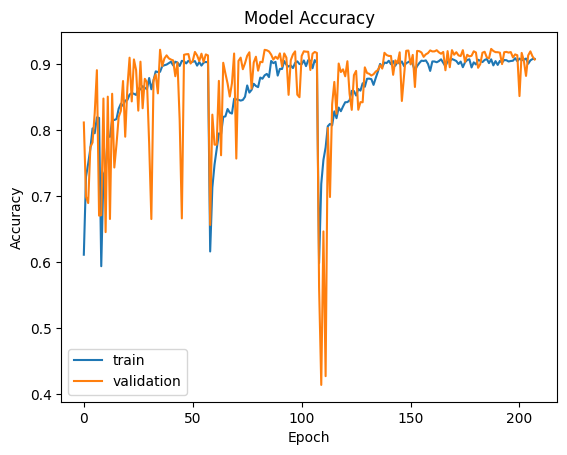

In [68]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
!pip install transformers


     ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
     --------- ----------------------------- 30.7/129.4 kB 1.3 MB/s eta 0:00:01
     ----------------- ------------------- 61.4/129.4 kB 544.7 kB/s eta 0:00:01
     ------------------------------- ---- 112.6/129.4 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 129.4/129.4 kB 692.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
    --------------------------------------- 0.1/8.4 MB 3.3 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.4 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.3/8.4 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.4 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.4/8.4 MB 2.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.4 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.4 MB 2.6 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
train_data

,comments_count,likes_count,reposts_count,views_count,group_source,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299
5621,5,127,148,14993,https://vk.com/anekdotikategoriib,0.053576,-0.042906,0.012976,0.011171,-0.017653,...,-0.012312,0.008100,0.007929,-0.041176,-0.025200,0.012065,-0.014859,0.015694,-0.001335,-0.053800
16962,24,716,563,26683,https://vk.com/anekdotikategoriib,0.024871,-0.023471,0.004471,0.045186,-0.004257,...,-0.032314,0.008286,-0.006629,-0.040986,0.004086,0.028700,-0.011329,0.008100,-0.009186,-0.047171
53983,26,555,10,21062,https://vk.com/baneks,-0.000400,-0.027624,0.007586,0.016890,-0.020407,...,-0.030852,0.014372,-0.000028,-0.027462,-0.075503,0.008776,-0.038852,0.067338,-0.029241,-0.028341
11245,7,626,433,27113,https://vk.com/anekdotikategoriib,0.047300,-0.006233,-0.006878,-0.017167,0.000556,...,-0.037200,-0.028811,0.022289,-0.029089,-0.026322,0.013567,-0.012222,0.044256,0.006489,-0.028122
27305,0,401,21,41420,https://vk.com/jumoreski,0.053700,-0.033400,-0.072000,0.078300,-0.017600,...,-0.029700,-0.028900,-0.028100,-0.085600,0.021900,0.043800,-0.083100,-0.008500,-0.042600,-0.021100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,33,529,28,17281,https://vk.com/baneks,0.003530,-0.111910,-0.018950,0.078950,0.034820,...,0.030660,0.027370,-0.141030,-0.116890,-0.100000,0.090100,0.001880,-0.135760,0.058880,-0.061190
38158,0,2527,110,67242,https://vk.com/jumoreski,0.001278,-0.004300,-0.018232,-0.047727,0.042029,...,-0.002137,0.048946,-0.077820,-0.042466,-0.009498,-0.008137,-0.017905,0.033290,0.030510,0.044583
860,0,167,36,7507,https://vk.com/jewishpugs,0.023035,-0.010320,-0.006220,-0.015049,0.030602,...,-0.002127,0.022508,-0.022286,-0.026143,-0.092008,-0.012941,-0.034392,0.033782,0.027637,-0.027039
15795,37,1276,1278,93102,https://vk.com/anekdotikategoriib,0.021115,-0.021293,-0.009230,-0.002615,-0.003837,...,-0.046200,-0.007437,0.018889,-0.041541,-0.015767,0.003400,0.017870,0.015574,0.021033,-0.018067
